# Prever o custo de Seguro de Vida 
### Regressão com PyCaret

Nesse projeto será utilizado a técnica de AutoML, é um tipo de ferramenta que foca em produzir soluções de Machine Learning para um cientista de dados de forma mais rápida.

<p align="center">
  <img width="50%" src="https://image.freepik.com/vetores-gratis/seguro-medico-seguro-de-vida-parada-cardiaca-parada-cardiaca-elemento-de-design-de-ideia-de-dor-de-cabeca-contrato-de-protecao-a-saude-diagnostico-de-arritmia-ilustracao-vetorial-de-metafora-de-conceito-isolado_335657-1515.jpg" alt="Churn_Prediction"height=400px >
</p>

O PyCaret é uma biblioteca open-source e low-code de Python, que tem como objetivo reduzir o tempo entre os ciclos, e uma hipótese de experimentos de Machine Learning.

Esse framework possibilita que cientista de dados completem experimentos de ponta a ponta de uma forma rápida e eficiente. Comparando com outras bibliotecas do tipo, o PyCaret traz um diferencial de ser low-code, que demanda pouco código, e com comandos simples, para que opere em uma forma robusta.

Alguns pontos principais que serão abordados nesse projeto:

* Aquisição dos Dados
* Analise Exploratória dos Dados
* Modelo de Machine Learning
* PyCaret
* Conclusão

## Aquisição dos Dados

Pegamos uma Dataset que contem algumas informações que simulam o pagamento de um seguro de vida, iremos prever o custo do seguro, em cima dos dados disponibilizados no site do [kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).

In [1]:
# importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# arquivo de dados
DATA_FILE = 'https://raw.githubusercontent.com/villani31/DataSets/main/insurance.csv'

# importando dados
df = pd.read_csv(DATA_FILE)

## Analise Exploratória dos Dados

Para entendimento do Dataset, foi criado um dicionário de variáveis:

* `age` - Idade.
* `sex` - Sexo (masculino ou feminino).
* `bmi` - Índice de massa corporal, medida de peso.
* `children`- Quantidade de filhos.
* `smoker` - Fumante.
* `region` - Região.
* `charges` - Custos cobrado.

Nosso Dataset possui 1338 linhas e 7 colunas, a baixo uma amostra das 5 primeiras e ultimas linhas:

In [2]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
      'Numeros de variaveis: ',df.shape[1], '\n',
      'Numeros de linhas: ',df.shape[0])
print('-------------------------------------------------')

# lendo as primeiras linhas
df.head()

Dimensoes do Dataset: 
 Numeros de variaveis:  7 
 Numeros de linhas:  1338
-------------------------------------------------


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# ultimas linhas
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Uma forma resumida de obtermos informações do Dataset que está sendo analisado, comando info() nos da um resumo do tipo de variável que está sendo utilizado.

In [4]:
# informacoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos analisar que não temos valores ausentes em nosso Dataset, como mostra o comando, temos 0% de valores ausentes.

In [5]:
# identificar se tem valores ausentes
(df.isnull().sum() / df.shape[0] * 100)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Durante a analise, podemos identificar valores duplicados no Dataset, conforme mostra nos comandos, como temos somente uma linha duplicada, não irá causar problemas durante a nossa analise, mas mais para frente iremos remover esses valores duplicados.

In [6]:
# identificar valores duplicados
df[df.duplicated().values]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# mostrar valores duplicados
df[df['charges'].values == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Gerando plot para ter uma melhor visão da distribuição das variáveis.

A variável `sex` está distribuído quase 50% de masculino e feminino, sendo 50.52% masculino e 49.48% feminino, conforme podem analisar a baixo:

male      676
female    662
Name: sex, dtype: int64
---------------------------------------------------------------
Segurados do genero masculino representam 50.52% do dataset.
Segurados de genero feminino representam 49.48% do dataset.
---------------------------------------------------------------


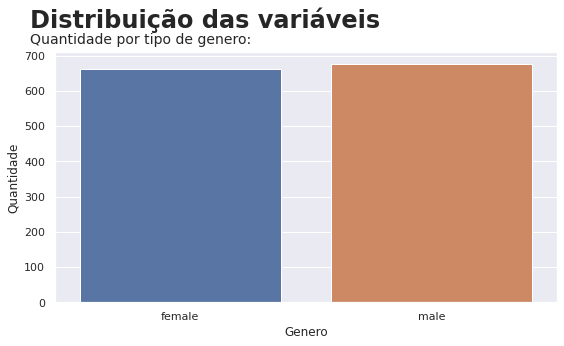

In [8]:
sns.set_theme(style="darkgrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(8,5))
print(df.sex.value_counts())
print('---------------------------------------------------------------')
print('Segurados do genero masculino representam {:.2f}% do dataset.'.format(df.sex.value_counts()[0] / df.shape[0] * 100))
print('Segurados de genero feminino representam {:.2f}% do dataset.'.format(df.sex.value_counts()[1] / df.shape[0] * 100))
print('---------------------------------------------------------------')
sns.countplot(x = 'sex', data=df, ax=ax)
# Titulo
ax.text(-0.6,780,'Distribuição das variáveis', fontsize=24, fontweight='bold')
ax.text(-0.6,735,'Quantidade por tipo de genero:', fontsize=14)
plt.xlabel('Genero',size=12)
plt.ylabel('Quantidade',size=12)
plt.tight_layout()

Uma variável importante do nosso Dataset, é a `smoker`, que da a informação se o usuário é fumante, ou não fumante, que pode gerar um custo maior na cobrança do seguro, conforme plot, temos 79.52% de não fumantes, e 20.58% de fumantes:

no     1064
yes     274
Name: smoker, dtype: int64
---------------------------------------------------------
Segurados não fumantes representam 79.52% do dataset:
Segurados fumantes representam 20.48% do dataset:
---------------------------------------------------------


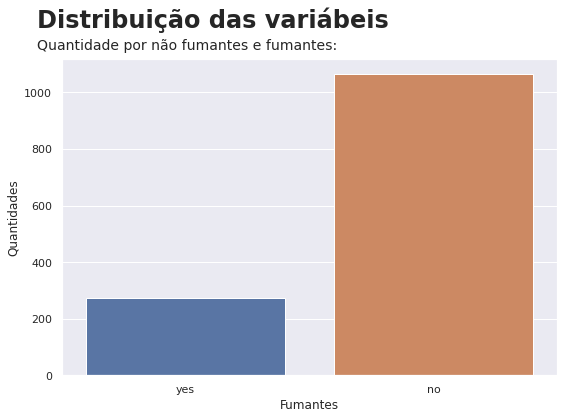

In [9]:
sns.set_theme(style="darkgrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(8,6))
print(df.smoker.value_counts())
print('---------------------------------------------------------')
print('Segurados não fumantes representam {:.2f}% do dataset:'.format(df.smoker.value_counts()[0] / df.shape[0] * 100))
print('Segurados fumantes representam {:.2f}% do dataset:'.format(df.smoker.value_counts()[1] / df.shape[0] * 100))
print('---------------------------------------------------------')
sns.countplot(x = 'smoker', data=df, ax=ax, palette='deep')
# titulo
ax.text(-0.6,1230, 'Distribuição das variábeis', fontsize=24, fontweight='bold')
ax.text(-0.6,1150, 'Quantidade por não fumantes e fumantes:', fontsize=14)
plt.xlabel('Fumantes',size=12)
plt.ylabel('Quantidades',size=12)
plt.tight_layout()

Agora um gráfico de histograma, gerando uma comparação entre as variáveis `changes` e `smoker`, que mostra que o segurador que `não` é fumante, o valor do seguro é mais barato, mas se o segurador é fumante, o valor cobrado fica mais caro, devido aos riscos que podem trazer para a saúde. 

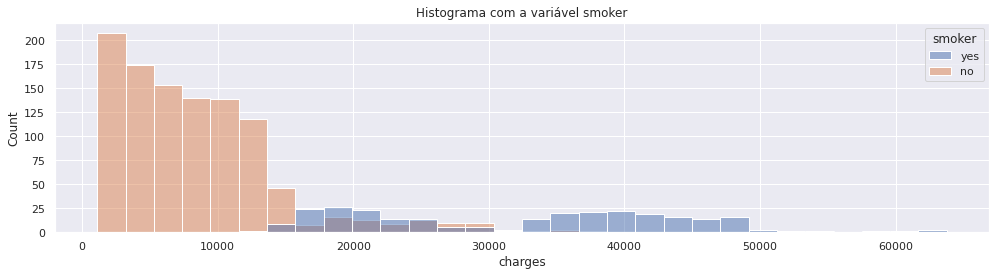

In [10]:
# histograma comparacao entre variaveis de fumantes e valores pagos
fig, ax = plt.subplots(figsize=(14,4))

sns.histplot(data=df, x = 'charges', ax=ax, hue = 'smoker')
ax.set_title('Histograma com a variável smoker')

plt.tight_layout()

Uma visão da distribuição das variáveis `age`, `bmi`, `children` e `changes`.

Através dos gráficos podemos notar:
* A maior parte dos segurados tem entre 18 a 20 anos.
* O BMI (índice de massa corporal), entre 30 a 35.
* Na maioria dos segurados, não possui filhos.
* E o custo dos plano anual, fica entre 10,000 até 20,000 mil dólares na maioria dos segurados.

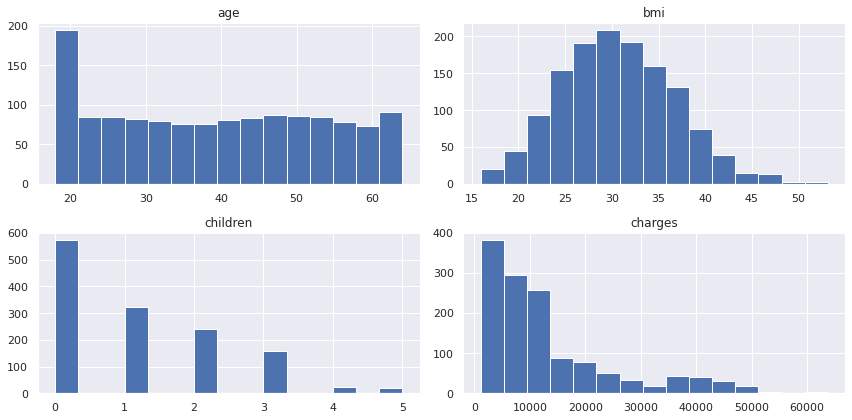

In [11]:
# Distribuição da variaveis numericas
df.hist(bins=15, figsize=(12,6))
plt.tight_layout()

* Vendo que a variável `region`, na minha visão, não irá interferir em nada no resultado final, será removido do Dataset..
* E conforme mostrada no inicio do projeto, temos um valor duplicado, e agora iremos remover essa duplicidade.

In [12]:
# criando uma copia do dataframe
dfa = df.copy()

# dropando a coluna region
dfa.drop(['region'], axis = 1, inplace=True)

# remover valores duplicados
dfa.drop([581],axis = 0, inplace = True)

Para termos um melhor resultando quando utilizarmos as técnicas de `Machine Learning`, iremos converter os valores das variáveis que estão como string, para 0 e 1:
* `sex`- Masculino = 0, Feminino = 1.
* `smoker` - Não Fumante = 0, Fumante = 1.

In [13]:
# Label encoding - tranformar variavel categoricas em numerica
# Substitundo valores
dfa['sex'].replace('male',0, inplace=True) # masculino = 0
dfa['sex'].replace('female',1, inplace=True) # feminino = 1
dfa['smoker'].replace('no',0, inplace=True) # nao fumante = 0
dfa['smoker'].replace('yes',1, inplace=True) # fumante = 1

# verificar dataset
dfa.head(3)

,age,sex,bmi,children,smoker,charges
0,19,1,27.90,0,1,16884.9240
1,18,0,33.77,1,0,1725.5523
2,28,0,33.00,3,0,4449.4620


Resumo estatístico do conjunto de dados, pode se analisar:
* A média de idade é de 39 anos.
* O valor média dos valores cobrados anualmente, fica em torno de 13 mil dólares.

In [14]:
# Resumo estatistico das variaveis numericas
#df.describe().round(3)
dfa.describe().round(2)

,age,sex,bmi,children,smoker,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00
mean,39.22,0.5,30.66,1.10,0.2,13279.12
std,14.04,0.5,6.10,1.21,0.4,12110.36
min,18.00,0.0,15.96,0.00,0.0,1121.87
25%,27.00,0.0,26.29,0.00,0.0,4746.34
50%,39.00,0.0,30.40,1.00,0.0,9386.16
75%,51.00,1.0,34.70,2.00,0.0,16657.72
max,64.00,1.0,53.13,5.00,1.0,63770.43


A baixo mostrar qual a correlação entre as variáveis:
* Correlação significa que existe uma relação entre as variáveis, ou seja, que uma variável justifique o valor da outra.

Foi criado a matriz de correlação e gerado uma heatmap, a partir dessa matriz.
* Uma correlação já esperada, é entre as variáveis `changes` e `smoker` que pode ser observado.

,age,sex,bmi,children,smoker,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000


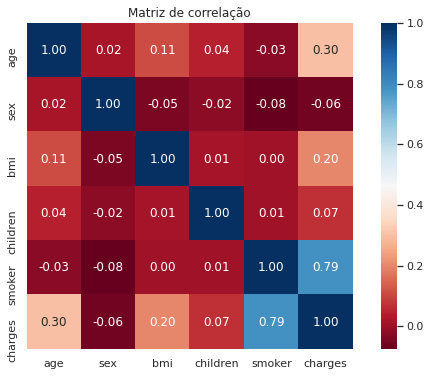

In [15]:
# plotar um heatmap a partir das correlaçoes
fig, ax = plt.subplots(figsize=(10,6))
corr = dfa.corr()
sns.heatmap(corr, cmap='RdBu', fmt = '.2f', square = True, linecolor='white', annot=True)
plt.title("Matriz de correlação")
corr

### Pandas Profiling

Uma outra maneira de fazer a nossa analise, poderia ser usando o `Pandas Profiling`, essa biblioteca nos ajuda a realizar as analises de forma mais rápida e prática, mas sempre é bom usar com cautela.
* Como pode analisar, a analise exploratório que foi feito a cima, condiz com o relatório gerado pelo `Pandas Profiling`.

In [30]:
# importando pacote
from pandas_profiling import ProfileReport

# criar profile report
report = ProfileReport(df)

# criar visualizacao ifrmae
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Modelo de Machine Learning

`Machine Learning` é uma tecnologia onde os computadores tem a capacidade de aprender de acordo com as respostas esperadas por meio de associações de diferentes dados.

* Nesse projeto vamos utilizar a técnica de AutoML, com o framework `PyCaret`.

Vamos iniciar separando os dados de `teste` e `treino`, lembrando que os dados de teste não podem ser usados para treinar o modelo, quando estivermos com nosso modelo pronto, ai sim, usaremos o modelo de teste, para fazer previsões.

In [16]:
# separando entre dados de treino e teste
test = dfa.sample(frac=0.10)
train = dfa.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

# Dimensoes
print('Dataset completo:\t ',dfa.shape)
print('Dataset de teste:\t ', test.shape)
print('Dataset de treino:\t ', train.shape)

Dataset completo:	  (1337, 6)
Dataset de teste:	  (134, 6)
Dataset de treino:	  (1203, 6)


### Configurando ambiente no Pycaret

In [32]:
# instalando
#!pip install pycaret -q

Importando os pacotes necessários.

In [17]:
# importando pacotes
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

Vamos passar os dados para o PyCaret, começar a explorar os dados, e preparar o modelo.

Aqui vamos criar um regressor (reg), passando os dados de traino e a variável alvo `changes`.

In [18]:
# criando o setup pycaret
reg = setup(data=train, target='charges')

,Description,Value
0,session_id,5156
1,Target,charges
2,Original Data,"(1203, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 10)"


### Criando um Pipeline

Através do setup, é onde vamos passar cada etapa do nosso pipeline.

In [21]:
# esconder o alerta que gera no proximo comando.
!export GIT_PYTHON_REFRESH=quiet

In [22]:
# criando um pipeline
reg = setup(data = dfa, 
           target = 'charges',
           normalize=True,
           log_experiment=True,
           experiment_name='charges_01')

,Description,Value
0,session_id,2177
1,Target,charges
2,Original Data,"(1337, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(935, 10)"


### Comprando modelos

Comparar todos os modelos para avaliar a performance é um ponto inicial e recomendado pelos desenvolvedores do `PyCaret`. Essa função treina todos os modelos e os avalia usando validação cruzada, para avaliação, a função imprime uma tabela que mostra a média do `MAE`, `MSE`, `RMSE`, `R2`, `RMSLE`  e `MAPE`, através dos folds.

* MAE - Mean Absolute Error: mostra a média do erro nos valores absolutos.
* MSE - Mean Squared Error: Erro quadrático média.
* RMSE - Root Mean Squared Error: Raiz do erro quadrático médio.
* R2 - Coefficent of Determintation R2 Score: Determina a pontuação do R2.
* RMSLE - Root Mean Squared Log Error: Erro de log da média quadrática.
* RAPE - Mean Absolute Percentage Error: Mostra a média do erro absoluto em valores percentuais.

In [23]:
# comprando melhor modelo
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2251.8744,18185543.1281,4227.6998,0.8634,0.3903,0.2599,0.0420
lightgbm,Light Gradient Boosting Machine,2535.3759,19541647.6274,4389.8889,0.8516,0.4508,0.3121,0.1950
rf,Random Forest Regressor,2327.3009,20699405.4119,4509.1017,0.8431,0.4108,0.2648,0.2060
xgboost,Extreme Gradient Boosting,2571.9078,22807556.6000,4741.6666,0.8295,0.4646,0.3095,10.7700
et,Extra Trees Regressor,2498.0479,25281492.0586,4975.4342,0.8097,0.4572,0.3025,0.2070
ada,AdaBoost Regressor,3948.4623,25632041.8143,5031.0148,0.8069,0.5946,0.6657,0.0180
dt,Decision Tree Regressor,2677.5112,33232297.2608,5742.3991,0.7507,0.4871,0.3136,0.0250
llar,Lasso Least Angle Regression,4203.9223,36692335.2796,6033.7934,0.7298,0.5603,0.4271,0.0130
ridge,Ridge Regression,4216.2773,36692794.0000,6033.4988,0.7297,0.5550,0.4294,0.0120
br,Bayesian Ridge,4213.2504,36696534.7107,6033.8385,0.7296,0.5558,0.4287,0.0120


Com poucas palavras de código, foi criado vários modelos, usando 10 folds de validação cruzada e avaliado com base em 6 métricas de avaliação mais utilizada (MAE, MSE, RMSE, R2, RMSLE e RAPE).

A tabela de `score` impressa em cima, destaca os modelos com melhores resultados nas médias das métricas de avaliação para comparação, por padrão, o grid é organizado a partir do R2.

No próximo comando, podemos ver os parâmetros do melhor modelo, que foi o Gradient Boosting Regressor.

In [24]:
# verificando o melhor modelo
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2177, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Listando todos os modelo que foi usado na comparação.

In [25]:
# verificando modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Instanciando o Modelo

A função de criar o modelo, cria e avalia usando uma `stratified cross validation`. Para esse conjunto especificamente, vamos focar em apenas um modelo, o Gradient Boosting Regressor, ou `gbr`, que foi nosso melhor modelo.

`Gradient Boosting` é uma das técnicas mais poderosa para construir modelos preditivos. Em termos básicos, envolve em 3 elementos:
* Uma loss function para ser otimizada.
* Um Weak Learner para fazer previsões.
* Um modelo aditivo para adicionar aos Weak Learners para minimizar a loss function.

Basicamente podemos dizer, que ele vai aprender com os erros, e melhorar a cada passagem.

In [26]:
# instanciando o modelo
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2243.1523,15242792.2588,3904.2019,0.9030,0.3879,0.3016
1,2299.7631,15061526.5179,3880.9183,0.9153,0.4153,0.3571
2,1792.2528,10139194.5224,3184.2102,0.9247,0.2962,0.2206
3,2315.8419,20199893.8330,4494.4292,0.8551,0.3507,0.2479
4,1774.1018,13210034.4769,3634.5611,0.8748,0.3928,0.2485
5,2318.1917,21029876.7908,4585.8344,0.8897,0.3810,0.2306
6,2688.2824,26673298.3194,5164.6199,0.7213,0.5201,0.2533
7,2205.6059,17060401.0270,4130.4238,0.8828,0.3260,0.2100
8,2421.1700,22393759.7138,4732.2045,0.7666,0.4207,0.2799
9,2460.3823,20844653.8209,4565.5946,0.9010,0.4120,0.2499


A média pode ficar parecida que vimos anteriormente, no compare_models, isso porque o modelo é criado e avaliado da mesma forma que fizemos anteriormente.

In [27]:
# verificando os parametros
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2177, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Tuning do Modelo

Quando um modelo é criado usando create_model, ele usa hiperparâmetros padrão para cada modelo. Para fazer um tuning desses parâmetros, usamos a função tune_model().

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez avalia com validação cruzada.

In [28]:
# tuning de parametros
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2104.0116,12591327.1536,3548.4260,0.9199,0.3674,0.2972
1,2248.1404,14334163.1725,3786.0485,0.9194,0.3563,0.2904
2,2026.7106,10279106.5658,3206.1046,0.9237,0.3028,0.2416
3,2301.6334,18253510.7548,4272.4128,0.8690,0.3516,0.2561
4,1802.5698,12378306.6417,3518.2818,0.8827,0.3969,0.2672
5,2168.7739,19697990.2025,4438.2418,0.8967,0.3335,0.2038
6,2506.6677,25074034.9242,5007.3980,0.7380,0.5095,0.2346
7,2104.5568,16112682.2482,4014.0606,0.8893,0.3225,0.2048
8,2495.7854,24666926.4060,4966.5810,0.7429,0.3993,0.2454
9,2446.4228,21199455.9400,4604.2867,0.8993,0.3995,0.2557


O tune_model é uma função que faz o random grid search dos hiperparâmetros, por padrão é configurado para otimizar o R2. 

Pode reparar que a performanse melhorou, alem dos outros modelos não terem sido melhor que o GBR, com os parâmetros configurado no padrão, outros modelos após o tuning, poderiam ter uma melhora maior, por isso sempre interessante testar em torno de 3 modelos, mas nesse projeto vamos manter apenas um.

In [29]:
# verificando os parametros
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0002, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2177, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Plotando Modelos

Com a função plot_model(), usado para plotar visualizações sobre a performance do nosso modelo. Essa função recebe o modelo treinado como entrada de dados, e retorna o plot baseado no desempenho com o pedaço do conjunto de dados separado para teste.

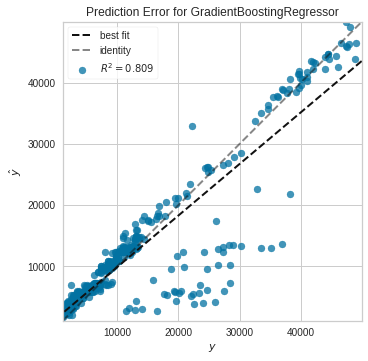

In [30]:
# plotando matriz de confusao
plot_model(tuned_gbr, plot='error')

Outra visualização importante é a de feature_importance, que mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, o poder preditivo de cada variável. 

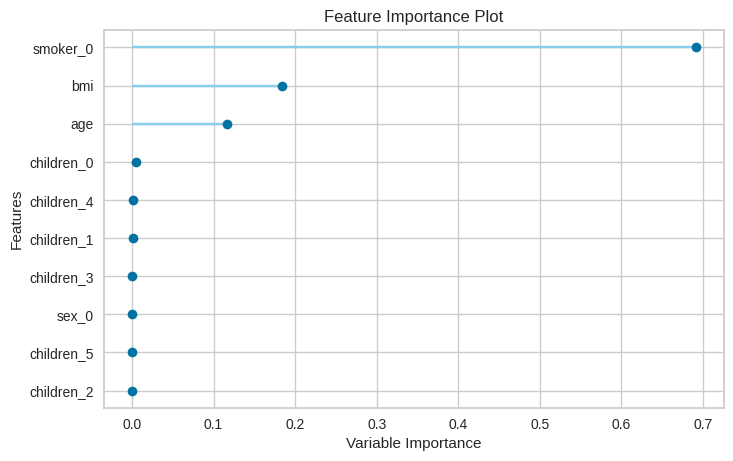

In [31]:
# features importantes
plot_model(tuned_gbr, plot='feature')

### Fazendo previsões

Antes de finalizar o modelo, é recomendável que faça uma checagem final, fazendo previsões nos conjunto de teste e revisando as métricas da avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [32]:
# fazendo previsoes
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2783.0639,27831235.8145,5275.5318,0.8090,0.4668,0.2897


O R2 no conjunto de teste, ficou em 0.8634, comparado a 0.8090 na média da validação cruzada, não sendo uma diferença significante.

Caso houvesse uma diferença significante entre esses resultados, seria um indicio de over-fitting, entre os fatores que necessitariam de investigação, nesse caso vamos seguir para finalizar o modelo.

### Finalizado o Modelo

Finalizar o modelo é o ultimo passo de nosso projeto, a função finaliza_model(), será levado ao melhor modelo com dados ainda não visto, incluindo o conjunto de teste separado anteriormente.

O propósito desse é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [33]:
# finalizar e analisa o modelo
final_gbr = finalize_model(tuned_gbr)
predict_model(final_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2769.7418,24884243.9768,4988.4110,0.8292,0.4468,0.3125


In [34]:
# verificar os parametros
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0002, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2177, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Prevendo dados novos

A função predict_model() também é usada para prever em datasets nunca visto antes, a única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram visto pelo modelo, separado anteriormente no começo do projeto, esse conjunto contem 10% dos dados.

In [35]:
# previsao de dados novos nao visto
unssen_prediction = predict_model(final_gbr, data=test)
unssen_prediction.head()

,age,sex,bmi,children,smoker,charges,Label
0,44,0,32.015,2,0,8116.26885,9985.003097
1,52,0,36.765,2,0,26467.09737,13922.538497
2,26,0,27.060,0,1,17043.34140,18988.765510
3,30,1,27.930,0,0,4137.52270,4830.060463
4,24,1,30.210,3,0,4618.07990,5556.067488


A coluna Label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBR.

### Salvando o modelo

Agora terminamos nosso projeto, salvar para mantê-lo utilizável e pronto para novas previsões em novos dados. A função save_model(), nós conseguimos salvar nosso modelo treinado, dentro dele está contido todos os pipeline de pré-processamento que foi utilizado.

In [36]:
# salvando o modelo
save_model(final_gbr,'Modelo_fina_04-12-21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=2, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0002,
                        

### Carregando um modelo

Para carregar o modelo salvo, usa a função load_model(), passando como parâmetro o nome do arquivo salvo.

In [37]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_fina_04-12-21')

Transformation Pipeline and Model Successfully Loaded


In [38]:
# fazendo previsao com o modelo salvo
new_prediction = predict_model(saved_final_gbr, data=test)
new_prediction.head()

,age,sex,bmi,children,smoker,charges,Label
0,44,0,32.015,2,0,8116.26885,9985.003097
1,52,0,36.765,2,0,26467.09737,13922.538497
2,26,0,27.060,0,1,17043.34140,18988.765510
3,30,1,27.930,0,0,4137.52270,4830.060463
4,24,1,30.210,3,0,4618.07990,5556.067488


## Conclusão

Através da análise feita, conseguimos criar um modelo onde é possível estimar o valor do plano se seguro saúde. Nesse projeto utilizamos o modelo GBR, que foi escolhido pelo método `best`, utilizando os valores padrões, mas após o tuning dos parâmetros, algum outro modelo poderia ter um melhor resultado, em comparação com o GBR, e sim poderia ser utilizado.

Com isso mostra que a biblioteca PyCaret que tem como objetivo simplificar e reduzir o tempo de um cientista de dados, é uma ferramenta muito poderosa, mas que precisa ser utilizado com cautela.